In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
import tensorflow as tf

In [ ]:
import skimage
from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
health_img_train = cv2.imread("/content/drive/MyDrive/data/train/Healthy/01.jpeg")
type_1_img_train = cv2.imread("/content/drive/MyDrive/data/train/Type 1 disease/01.jpeg")
type_2_img_train = cv2.imread("/content/drive/MyDrive/data/train/Type 2 disease/01.jpeg")

In [ ]:
health_img_train.shape

(1708, 1944, 3)

*
Sample Images*

Text(0.5, 1.0, 'Type 2')

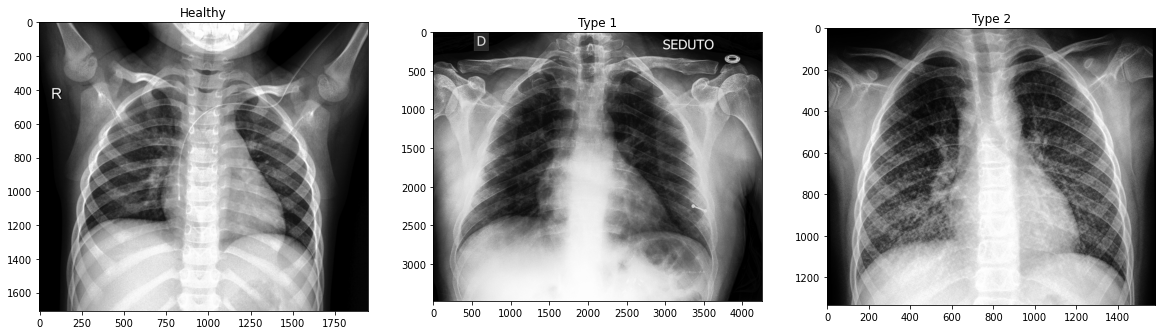

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(131)
plt.imshow(health_img_train)
plt.title("Healthy")
plt.subplot(132)
plt.imshow(type_1_img_train)
plt.title("Type 1")
plt.subplot(133)
plt.imshow(type_2_img_train)
plt.title("Type 2")

In [ ]:
import os, os.path
img_list =[]

for i in ["train","test"]:
    path = "/content/drive/MyDrive/data/"
    path = os.path.join(path,i)

    for j in ["Healthy","Type 1 disease","Type 2 disease"]:
        path = os.path.join(path,j)
        imgs = []
        
        for k in os.listdir(path):
            imgs.append(cv2.imread(os.path.join(path,k)))
            
        img_list.append(imgs)    
        path = os.path.dirname(path)
        

In [ ]:
train_healthy = img_list[0]
train_type_1 = img_list[1]
train_type_2 = img_list[2]
test_healthy = img_list[3]
test_type_1 = img_list[4]
test_type_2 = img_list[5]

In [ ]:
import re
def train_augmentation(image):
  
  augmen = []
  augmen.append(resize(image,(48,48),anti_aliasing= True))       #Resizing

  flip_up = tf.image.flip_up_down(image)                         #flipping up_down
  augmen.append(resize(flip_up,(48,48),anti_aliasing= True))  

  flip_left_right = tf.image.flip_left_right(image)            #flipping left_right
  augmen.append(resize(flip_left_right,(48,48),anti_aliasing= True)) 

  rot_90 = tf.image.rot90(image,k =1)                          # rotating 90
  augmen.append(resize(rot_90,(48,48),anti_aliasing= True)) 

  rot_180 = tf.image.rot90(image,k =2)                          # rotating 180
  augmen.append(resize(rot_180,(48,48),anti_aliasing= True)) 

  rot_270 = tf.image.rot90(image,k =3)                             # rotating  270
  augmen.append(resize(rot_270,(48,48),anti_aliasing= True)) 

  h,w,c = image.shape                                               # Translation
  padded_image = tf.image.pad_to_bounding_box(image, 50, 50, h+150, w+150)  
  output = tf.image.crop_to_bounding_box(padded_image, 0, 0, h+100,w+100)
  augmen.append(resize(output,(48,48),anti_aliasing= True))
 

  return augmen

Applying function for One Image

In [ ]:
augmen_healthy = train_augmentation(train_healthy[0])

Text(0.5, 1.0, 'Translation')

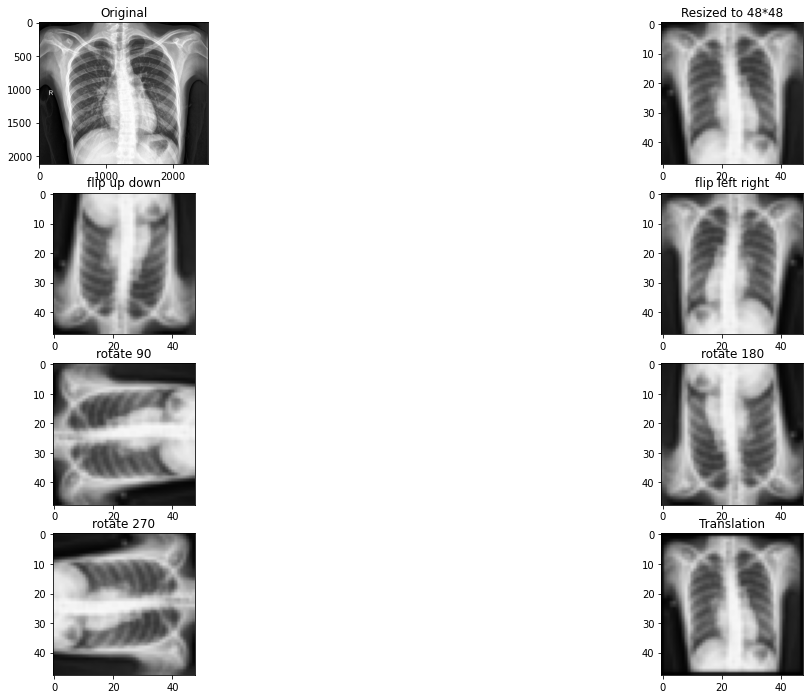

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(421)
plt.imshow(train_healthy[0])
plt.title("Original")

plt.subplot(422)
plt.imshow(augmen_healthy[0])
plt.title("Resized to 48*48")

plt.subplot(423)
plt.imshow(augmen_healthy[1])
plt.title("flip up down")

plt.subplot(424)
plt.imshow(augmen_healthy[2])
plt.title("flip left right")

plt.subplot(425)
plt.imshow(augmen_healthy[3])
plt.title("rotate 90")

plt.subplot(426)
plt.imshow(augmen_healthy[4])
plt.title("rotate 180")

plt.subplot(427)
plt.imshow(augmen_healthy[5])
plt.title("rotate 270")

plt.subplot(428)
plt.imshow(augmen_healthy[6])
plt.title("Translation")


In [ ]:
train_healthy_augmen = []
train_healthy_augmen.extend(train_augmentation(i) for i in train_healthy) 

In [ ]:
train_healthy_augmen = [i for sublist in train_healthy_augmen for i in sublist]

In [ ]:
len(train_healthy_augmen)

490

In [ ]:
train_type_1_augmen = []
train_type_1_augmen.extend(train_augmentation(i) for i in train_type_1) 
train_type_1_augmen = [i for sublist in train_type_1_augmen for i in sublist]

In [ ]:
len(train_type_1_augmen)

777

In [ ]:
train_type_2_augmen = []
train_type_2_augmen.extend(train_augmentation(i) for i in train_type_2) 
train_type_2_augmen = [i for sublist in train_type_2_augmen for i in sublist]

In [ ]:
len(train_type_2_augmen)

490

In [ ]:
def test_augmentation(image):
  return resize(image,(48,48),anti_aliasing= True)

In [ ]:
test_healthy_augmen = []
test_healthy_augmen.extend(test_augmentation(i) for i in test_healthy) 

In [ ]:
len(test_healthy_augmen)

20

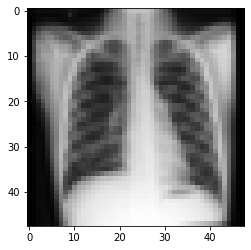

In [ ]:
plt.imshow(test_healthy_augmen[1])

In [ ]:
test_type_1_augmen = []
test_type_1_augmen.extend(test_augmentation(i) for i in test_type_1) 

In [ ]:
len(test_type_1_augmen)

26

In [ ]:
test_type_2_augmen = []
test_type_2_augmen.extend(test_augmentation(i) for i in test_type_2) 

In [ ]:
len(test_type_2_augmen)

20

In [ ]:
x_train = train_healthy_augmen+train_type_1_augmen+train_type_2_augmen

In [ ]:
len(x_train)

1757

In [ ]:
y_train = (len(train_healthy_augmen)*' 0'+len(train_type_1_augmen)*' 1'+len(train_type_2_augmen)*' 2').split(' ')
y_train = y_train[1:]

In [ ]:
len(y_train)

1757

In [ ]:
x_test = test_healthy_augmen+ test_type_1_augmen + test_type_2_augmen

In [ ]:
len(x_test)

66

In [ ]:
y_test = (len(test_healthy_augmen)*' 0'+len(test_type_1_augmen)*' 1'+len(test_type_2_augmen)*' 2').split(' ')
y_test = y_test[1:]

In [ ]:
len(y_test)

66

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **DEEP LEARNING MODELLING**

# **1.CNN MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score

In [ ]:
input_shape = (48,48,3)
num_classes = 3

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides = (1,1),padding = "same" , activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides =(1,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),strides = (1,1),padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides =(1,1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 47, 47, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                        

In [ ]:
categorical_crossentropy = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
rmsprop = tf.keras.optimizers.RMSprop( learning_rate=0.001,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,name='RMSprop') 


model.compile(loss = categorical_crossentropy,
              optimizer = rmsprop,
              metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience = 2)

In [ ]:
x_train = np.stack(x_train,axis = 0)
x_test = np.stack(x_test,axis = 0)

In [ ]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size = 10, epochs=10,verbose=1,callbacks=[es])

Epoch 1/10
176/176 [==============================] - 276s 2s/step - loss: 0.4719 - accuracy: 0.8099 - val_loss: 1.8850 - val_accuracy: 0.3939
Epoch 2/10
176/176 [==============================] - 270s 2s/step - loss: 0.2814 - accuracy: 0.8970 - val_loss: 2.0928 - val_accuracy: 0.4091
Epoch 3/10
176/176 [==============================] - 267s 2s/step - loss: 0.2031 - accuracy: 0.9317 - val_loss: 0.7748 - val_accuracy: 0.7121
Epoch 4/10
176/176 [==============================] - 262s 1s/step - loss: 0.1535 - accuracy: 0.9573 - val_loss: 1.0556 - val_accuracy: 0.7273
Epoch 5/10
176/176 [==============================] - 263s 1s/step - loss: 0.1301 - accuracy: 0.9602 - val_loss: 0.1446 - val_accuracy: 0.9545
Epoch 6/10
176/176 [==============================] - 271s 2s/step - loss: 0.0888 - accuracy: 0.9738 - val_loss: 0.4189 - val_accuracy: 0.8333
Epoch 7/10
176/176 [==============================] - 258s 1s/step - loss: 0.0865 - accuracy: 0.9801 - val_loss: 0.4798 - val_accuracy: 0.8788

In [ ]:
train_error, train_acc = model.evaluate(x_train, y_train, verbose=1)
test_error, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))

3/3 [==============================] - 1s 237ms/step - loss: 0.4798 - accuracy: 0.8788
Train: 97.837, Test: 87.879


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


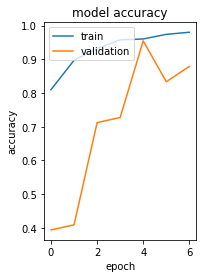

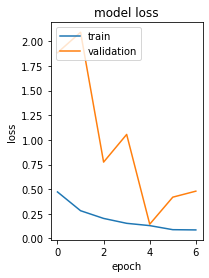

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = to_categorical(np.argmax(y_pred,axis =1))

In [ ]:
print("Precision Score:",precision_score(y_test,y_pred,average = "weighted")*100)
print("Recall Score :",recall_score(y_test,y_pred,average = "weighted")*100)
print("F1_Score:",f1_score(y_test,y_pred,average = "weighted")*100)

Precision Score: 90.36112761602958
Recall Score : 87.87878787878788
F1_Score: 88.10895034299287


We got a Training Accuracy of 97% & Validation Accuracy of 88%

# **2. Transfer Learning with MobileNet** 

In [77]:
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D,BatchNormalization,Dense,Dropout

In [78]:
base_model = mobilenet.MobileNet( input_shape= (48,48,3),alpha=1.0,depth_multiplier=1,dropout=0.001,include_top=False,weights="imagenet",
                                 input_tensor=None,pooling=None,classes=3,classifier_activation="softmax")

In [79]:
last = base_model.get_layer('conv_pw_13_relu').output
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
number_of_classes = 3
top = Dense(number_of_classes, activation='softmax')(x)

mobile_net_model = Model(base_model.input, top)

In [80]:
print(mobile_net_model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                                    

In [81]:
categorical_crossentropy = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
rmsprop = tf.keras.optimizers.RMSprop( learning_rate=0.001,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,name='RMSprop') 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience = 2)

mobile_net_model.compile(loss = categorical_crossentropy,
              optimizer = rmsprop,
              metrics = ['accuracy'])

In [82]:
mobile_net_history = mobile_net_model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size = 10, epochs=10,verbose=1,callbacks=[es])

Epoch 1/10
176/176 [==============================] - 82s 352ms/step - loss: 1.0631 - accuracy: 0.6426 - val_loss: 3.2898 - val_accuracy: 0.3939
Epoch 2/10
176/176 [==============================] - 57s 321ms/step - loss: 0.7744 - accuracy: 0.7348 - val_loss: 0.7914 - val_accuracy: 0.7424
Epoch 3/10
176/176 [==============================] - 48s 272ms/step - loss: 0.7285 - accuracy: 0.8019 - val_loss: 0.6532 - val_accuracy: 0.6667
Epoch 4/10
176/176 [==============================] - 44s 249ms/step - loss: 0.8390 - accuracy: 0.7928 - val_loss: 0.7615 - val_accuracy: 0.8333
Epoch 5/10
176/176 [==============================] - 43s 245ms/step - loss: 0.5235 - accuracy: 0.8463 - val_loss: 0.3046 - val_accuracy: 0.8333
Epoch 6/10
176/176 [==============================] - 44s 249ms/step - loss: 0.5891 - accuracy: 0.8657 - val_loss: 0.3186 - val_accuracy: 0.8788
Epoch 7/10
176/176 [==============================] - 47s 266ms/step - loss: 0.4327 - accuracy: 0.8702 - val_loss: 0.1095 - val_ac

In [83]:
train_error, train_acc = mobile_net_model.evaluate(x_train, y_train, verbose=1)
test_error, test_acc = mobile_net_model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))

3/3 [==============================] - 0s 38ms/step - loss: 0.1142 - accuracy: 0.9545
Train: 95.390, Test: 95.455


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


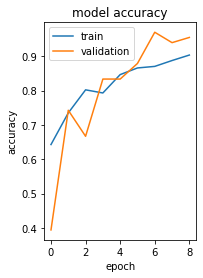

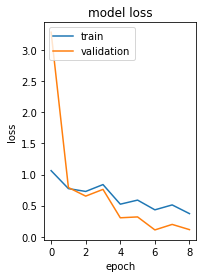

In [84]:
print(mobile_net_history.history.keys())
#  "Accuracy"
plt.subplot(121)
plt.plot(mobile_net_history.history['accuracy'])
plt.plot(mobile_net_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.subplot(122)
plt.plot(mobile_net_history.history['loss'])
plt.plot(mobile_net_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [95]:
y_pred = mobile_net_model.predict(x_test)
y_pred = to_categorical(np.argmax(y_pred,axis =1))

In [96]:
print("Precision Score:",precision_score(y_test,y_pred,average = "weighted")*100)
print("Recall Score :",recall_score(y_test,y_pred,average = "weighted")*100)
print("F1_Score:",f1_score(y_test,y_pred,average = "weighted")*100)

Precision Score: 95.43091736074192
Recall Score : 95.45454545454545
F1_Score: 95.41056427848882


We got a Training Accuracy of 90% and Validation Accuracy of 95%

# **3. TRANSFER LEARNING WITH DENSE NET 121**

In [90]:
from tensorflow.keras.applications import densenet
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D
from IPython.display import Image

In [87]:
base_model = densenet.DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 

x = base_model.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

top=Dense(3,activation='softmax')(x)
densenet_model=Model(inputs=base_model.input,outputs=top)
densenet_model.summary()

29097984/29084464 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_4[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                           

In [88]:
for layer in densenet_model.layers[:-8]:
    layer.trainable=False

In [89]:
categorical_crossentropy = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience = 2)

densenet_model.compile(loss = categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(lr=1e-4),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [91]:
X_train = np.array([cv2.resize(x, (48, 48), interpolation = cv2.INTER_AREA) for x in x_train])
X_test = np.array([cv2.resize(x, (48, 48), interpolation = cv2.INTER_AREA) for x in x_test])

In [93]:
train_datagen = ImageDataGenerator(rescale=1. / 255,horizontal_flip=False)
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train,y_train, batch_size=7)

val_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=False)
val_datagen.fit(X_test)
val_generator = val_datagen.flow(X_test,y_test,batch_size=7)

In [100]:
X_train.shape

(1757, 48, 48, 3)

In [97]:
# We're ready to start training now

train_steps_per_epoch = X_train.shape[0] // 7
val_steps_per_epoch = X_test.shape[0] // 7

densenet_history = densenet_model.fit_generator(train_generator,steps_per_epoch=train_steps_per_epoch,
                                                 validation_data=val_generator,validation_steps=val_steps_per_epoch,
                                                 epochs=15,verbose=1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


251/251 [==============================] - 32s 98ms/step - loss: 1.0630 - accuracy: 0.6005 - val_loss: 1.2712 - val_accuracy: 0.4127
Epoch 2/15
251/251 [==============================] - 22s 87ms/step - loss: 0.8075 - accuracy: 0.6932 - val_loss: 0.6258 - val_accuracy: 0.6984
Epoch 3/15
251/251 [==============================] - 31s 124ms/step - loss: 0.7709 - accuracy: 0.7393 - val_loss: 0.3521 - val_accuracy: 0.8413
Epoch 4/15
251/251 [==============================] - 24s 96ms/step - loss: 0.6694 - accuracy: 0.7513 - val_loss: 0.3540 - val_accuracy: 0.8571
Epoch 5/15
251/251 [==============================] - 23s 92ms/step - loss: 0.7004 - accuracy: 0.7325 - val_loss: 0.3847 - val_accuracy: 0.8413
Epoch 6/15
251/251 [==============================] - 30s 119ms/step - loss: 0.7118 - accuracy: 0.7359 - val_loss: 0.4832 - val_accuracy: 0.8413
Epoch 7/15
251/251 [==============================] - 26s 103ms/step - loss: 0.6521 - accuracy: 0.7547 - val_loss: 0.3998 - val_accuracy: 0.8571


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


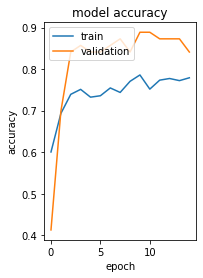

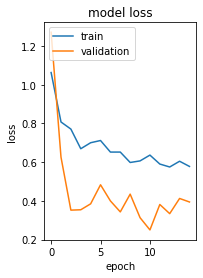

In [98]:
print(densenet_history.history.keys())
#  "Accuracy"
plt.subplot(121)
plt.plot(densenet_history.history['accuracy'])
plt.plot(densenet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.subplot(122)
plt.plot(densenet_history.history['loss'])
plt.plot(densenet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [107]:
y_pred = densenet_model.predict_generator(val_generator)
y_pred = to_categorical(np.argmax(y_pred,axis =1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [108]:

print("Precision Score:",precision_score(y_test,y_pred,average = "weighted")*100)
print("Recall Score :",recall_score(y_test,y_pred,average = "weighted")*100)
print("F1_Score:",f1_score(y_test,y_pred,average = "weighted")*100)

Precision Score: 38.1379007465964
Recall Score : 37.878787878787875
F1_Score: 37.769749047944536


We got a Training Accuracy of 78% and Validation Accuracy of 84%

Comparitively All three Models are performing Good.

But **Precision,Recall & F1 Score and Accuracy** for Mobile Net Model was **Very High** compared to Other Models